## Set random seed to produce same results in every run

In [9]:
from numpy.random import seed
seed(111)
import tensorflow as tf
tf.random.set_seed(111)

In [10]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix

## Load Dataset

In [11]:
df = pd.read_csv("dataset_binary.csv")
df.head()

,Review,Rating
0,it`s the place i want to like. it`s local to m...,0
1,"For the youngsters of the world, funky, fast a...",0
2,We admittedly had inflated expectations of thi...,0
3,This was our second trip to Kiss Kiss with the...,0
4,The food was not bad... but nothing spectacula...,0


## Dataset includes 500 positive and 500 negative reviews.

In [12]:
df["Rating"].value_counts()

0    500
1    500
Name: Rating, dtype: int64

## Preprocessing

* Remove everything except letters
* Convert to lowercase
* Stemming

In [13]:
import nltk
nltk.download('stopwords') # download stopwords

import re
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stopwords_english = stopwords.words('english')
corpus = []

for x in range(0, df.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', df["Review"][x]) # remove everything except letters
    review = review.lower() # convert everthing to lowercase
    review = review.split() #split a review into a list
    review = [stemmer.stem(i) for i in review if i not in set(stopwords_english)] #stemming and deleting stopwords
    review = ' '.join(review) #Join all items in a list into a string
    corpus.append(review) #add review to corpus list


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yasem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Creating bag-of-words model

In [14]:
# Creating a Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()                      # vectorize unique words of the corpus
X = cv.fit_transform(corpus).toarray()      # toarray() is used to convert into matrix
y = df.iloc[:,1].values                     # get labels from dataframe

In [15]:
print(f"X is a: {X.shape} shaped matrix")
print(f"Each row represents a review with an array of {len(X[0])} elements")

X is a: (1000, 2644) shaped matrix
Each row represents a review with an array of 2644 elements


In [16]:
y.shape

(1000,)

## Split dataset -> Train: %80, Test: %20

In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, stratify=y)

In [18]:
accs = {} # store accuracies of ml algorithms

## Confusion matrix visualization

In [19]:
import seaborn as sns
# source: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
def print_confusion_matrix(cf_matrix):
    df_cm = pd.DataFrame(cf_matrix, columns=np.unique([0,1]), index = np.unique([0,1]))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(df_cm, annot=labels, fmt="", cmap='Blues')


## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
# Create DT classifier
clf = DecisionTreeClassifier(random_state=0)
# Train on train dataset
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

Accuracy: 0.715
Precision: 0.6869565217391305
Recall: 0.79
F1-Score: 0.7348837209302327


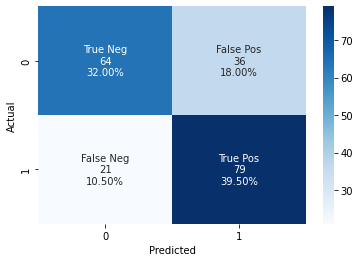

In [21]:
#print("confusion matrix:\n", confusion_matrix(y_test, y_pred))

# add decision tree accuracy score to accuracy dictionary (acc_80s)
accs["DT"] = metrics.accuracy_score(y_test, y_pred)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
# f1-score
print("F1-Score:",metrics.f1_score(y_test, y_pred))

c = confusion_matrix(y_test, y_pred)
print_confusion_matrix(c)

## SVM

In [22]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

Accuracy: 0.87
Precision: 0.8245614035087719
Recall: 0.94
F1-Score: 0.8785046728971964


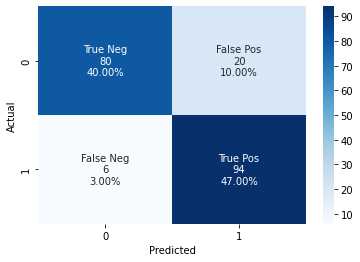

In [23]:
#print("confusion matrix:\n", confusion_matrix(y_test, y_pred))

# add svm accuracy score to accuracy dictionary (acc_80s)
accs["SVM"] = metrics.accuracy_score(y_test, y_pred)

# Model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
# f1-score
print("F1-Score:",metrics.f1_score(y_test, y_pred))

c = confusion_matrix(y_test, y_pred)
print_confusion_matrix(c)

## Random Forest

In [24]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
# Train the model 
clf.fit(X_train,y_train)
# Predict on test set
y_pred=clf.predict(X_test)

Accuracy: 0.845
Precision: 0.8053097345132744
Recall: 0.91
F1-Score: 0.8544600938967136


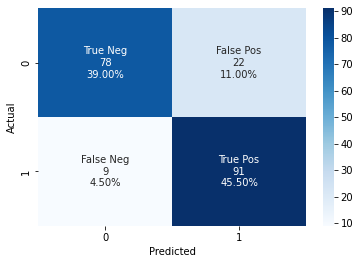

In [25]:
#print("confusion matrix:\n", confusion_matrix(y_test, y_pred))

# add random forest accuracy score to accuracy dictionary (acc_80s)
accs["RF"] = metrics.accuracy_score(y_test, y_pred)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
# f1-score
print("F1-Score:",metrics.f1_score(y_test, y_pred))

c = confusion_matrix(y_test, y_pred)
print_confusion_matrix(c)

## Logistic Regression

In [26]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
# predict on test dataset
y_pred=logreg.predict(X_test)

Accuracy: 0.89
Precision: 0.8611111111111112
Recall: 0.93
F1-Score: 0.8942307692307692


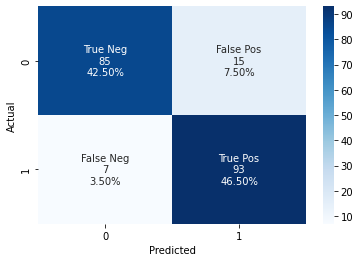

In [27]:
#print("confusion matrix:\n", confusion_matrix(y_test, y_pred))

# add logistic regression accuracy score to accuracy dictionary (acc_80s)
accs["LR"] = metrics.accuracy_score(y_test, y_pred)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
# f1-score
print("F1-Score:",metrics.f1_score(y_test, y_pred))

c = confusion_matrix(y_test, y_pred)
print_confusion_matrix(c)

## Naive Bayes

In [28]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

Accuracy: 0.88
Precision: 0.8518518518518519
Recall: 0.92
F1-Score: 0.8846153846153846


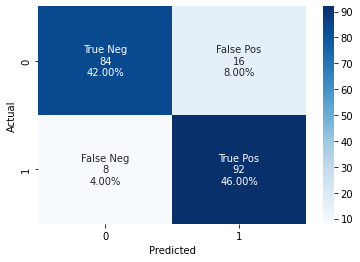

In [29]:
#print("confusion matrix:\n", confusion_matrix(y_test, y_pred))

# add naive bayes accuracy score to accuracy dictionary (acc_80s)
accs["NB"] = metrics.accuracy_score(y_test, y_pred)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
# f1-score
print("F1-Score:",metrics.f1_score(y_test, y_pred))

c = confusion_matrix(y_test, y_pred)
print_confusion_matrix(c)

## K-Nearest Neighbors

In [30]:
# import the classifier
from sklearn.neighbors import KNeighborsClassifier
# instantiate the model (using the default parameters)
knn = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
knn.fit(X_train, y_train)
#Predict on test dataset
y_pred = knn.predict(X_test) # 0:Overcast, 2:Mild

Accuracy: 0.62
Precision: 0.5740740740740741
Recall: 0.93
F1-Score: 0.7099236641221375


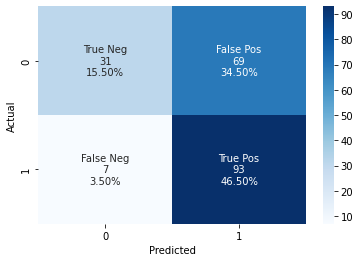

In [31]:
#print("confusion matrix:\n", confusion_matrix(y_test, y_pred))

# add knn accuracy score to accuracy dictionary (acc_80s)
accs["K-NN"] = metrics.accuracy_score(y_test, y_pred)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
# f1-score
print("F1-Score:",metrics.f1_score(y_test, y_pred))

c = confusion_matrix(y_test, y_pred)
print_confusion_matrix(c)

## Accuracies of different ML algorithms

In [32]:
print("acc: ", accs)

acc:  {'DT': 0.715, 'SVM': 0.87, 'RF': 0.845, 'LR': 0.89, 'NB': 0.88, 'K-NN': 0.62}
